## 02. Fetching binary data with `urllib` and unzipping files with `zipfile`

If you can get the web address, or URL, of a specific binary file that you found on some website, you can usually download it fairly easily using Python's native `urllib` package, which is a simple interface for interacting with network resources. 

Here, we demonstrate how to use the `request` sub-module of `urllib` package to send a request to a server and handle the repsonse. While `request` can do much more than just download files, we'll keep ourselves to its `request.urlretrieve` function, which is designed to fetch remote files, saving them as local files.. 

We'll use the urllib.urlretrive to download a Census tract shapefile located on the US Census's web server: https://www2.census.gov/geo/tiger/TIGER2017/TRACT. The one file we'll get is tracts for North Dakota (because it's a fairly small file): `tl_2017_38_tract.zip`. 

We'll also take this opportunity to examine how Python can unzip files with the `zipfile` library.

In [1]:
#Import the two modules
from urllib import request
import zipfile #module to unzip files

In [2]:
#Specify the URL of the resource
theURL = 'https://www2.census.gov/geo/tiger/TIGER2017/TRACT/tl_2017_38_tract.zip'

In [3]:
#Set a local filename to save the file as
localFile = 'tl_2017_38_tract.zip'

In [4]:
#The urlretrieve function downloads a file, saving it as the file name we specify
request.urlretrieve(url=theURL,filename=localFile)

('tl_2017_38_tract.zip', <http.client.HTTPMessage at 0x19070c6c588>)

Now take a look at the contents of your folder. You'll see a local copy of the zip file!

In [5]:
!dir *.zip #The exclamation means this is a DOS command, not a python command

 Volume in drive C is Windows
 Volume Serial Number is 8292-14BA

 Directory of C:\Users\yj107\GettingData

10/29/2018  12:37 PM         1,734,270 tl_2017_38_tract.zip

 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData


 Directory of C:\Users\yj107\GettingData

               1 File(s)      1,734,270 bytes
               0 Dir(s)  64,894,394,368 bytes free


This works for photos too...

In [6]:
imgURL = 'https://imgs.xkcd.com/comics/state_borders.png'
request.urlretrieve(url=imgURL,filename="map.jpg",);

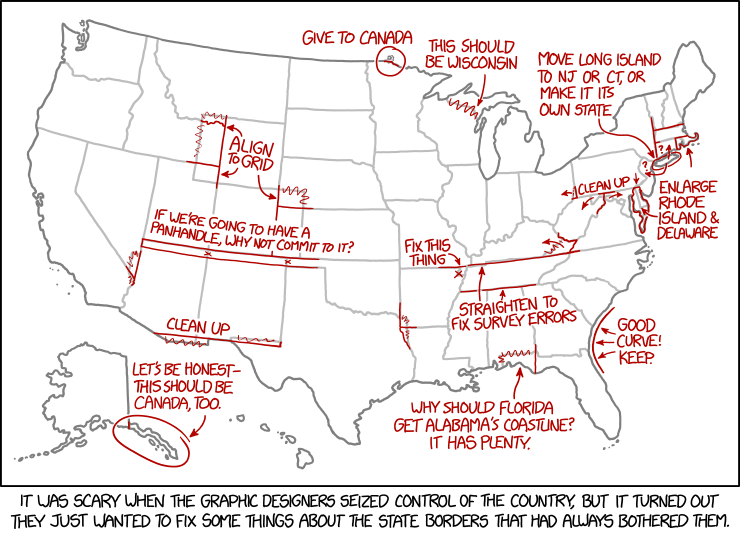

In [7]:
#Display the file in our notebook
from IPython.display import Image
Image("map.jpg")

So now, let's look at how the zipfile module can unzip it

In [10]:
#First open the local zip file as a zipFile object
zipObject = zipfile.ZipFile(localFile)

In [8]:
#Create a folder to hold the file

#Name the folder we'll create the same as the file, without the extension
outFolderName = localFile[:-4]

#Well us the os module to do check if the folder exists, and create if not
import os
if not os.path.exists(outFolderName): 
    outFolder = os.mkdir(localFile[:-4])

In [11]:
zipObject.extractall(path=outFolderName)
zipObject.close()

And viola! If we use some looping, we can tell Python to download a lot of files at our command!